# Predicting House Sale Prices

#### Darren Ho

## Introduction

In this project, we'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt). Our goal is to predict house sale prices using linear regression.  

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [2]:
# import dataset

ameshousing = pd.read_csv('AmesHousing.tsv', sep='\t')

print('Number of Rows:', ameshousing.shape[0])
print('Number of Columns:', ameshousing.shape[1])
pd.options.display.max_columns = ameshousing.shape[0]

Number of Rows: 2930
Number of Columns: 82


In [3]:
ameshousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [4]:
# sorted percentages of cols that is null

percent_missing = ((ameshousing.isnull().sum()/len(ameshousing))*100).round(2).sort_values(ascending=False)
percent_missing[percent_missing > 0]

Pool QC           99.56
Misc Feature      96.38
Alley             93.24
Fence             80.48
Fireplace Qu      48.53
Lot Frontage      16.72
Garage Qual        5.43
Garage Yr Blt      5.43
Garage Cond        5.43
Garage Finish      5.43
Garage Type        5.36
Bsmt Exposure      2.83
BsmtFin Type 2     2.76
BsmtFin Type 1     2.73
Bsmt Cond          2.73
Bsmt Qual          2.73
Mas Vnr Type       0.78
Mas Vnr Area       0.78
Bsmt Full Bath     0.07
Bsmt Half Bath     0.07
Garage Area        0.03
Garage Cars        0.03
Total Bsmt SF      0.03
Bsmt Unf SF        0.03
BsmtFin SF 2       0.03
BsmtFin SF 1       0.03
Electrical         0.03
dtype: float64

In [5]:
ameshousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# function that just returns the df for now
def transform_features(df):
    return df

# function that just returns the `Gr Liv Area` and `SalePrice` cols for now
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

# function that splits df into train and test sets, trains a model, and returns RMSE
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]

    # selecting only the numeric cols 
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    # want to predict `SalePrice` so we drop
    features = numeric_train.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    preds = lr.predict(test[features])
    mse = mean_squared_error(preds, test["SalePrice"])
    rmse = np.sqrt(mse)
    
    return rmse

transformed = transform_features(ameshousing)
selected = select_features(transformed)
rmse = train_and_test(selected)

rmse

57088.25161263909

We see that three of the columns contain over 90% `NaN` values.

We also created the `train_and_test` function to split a dataframe into train/test sets, train a model, and then to return a RMSE value. In the case of the `ameshousing` dataset, we get a value of approximately 57,088 when using only the `Gr Liv Area` feature. This means that the average distance between the predicted prices from the model and the actual prices in the dataset is $57,088. 

## Feature Engineering

We'll now update the `transform_features` function so that any column from the dataframe with more than 25% missing values is dropped. We also need to remove any columns that leak information about the sale  (e.g. like the year the sale happened). In general the goal of the function is to:

- remove features that we do not want to use in the model, just based on the number of missing values or data leakage
- transform features into the proper format
- create new features by combining other features

In [7]:
# we want to drop any column with over 25% missing values, but lets take a deeper look first
over25_null = percent_missing[percent_missing > 25]
print(over25_null)
print('\n')

# print col name and its unique values 
for col in ameshousing[over25_null.index].columns:
    print(col)
    print(ameshousing[over25_null.index][col].value_counts(dropna=False))
    print('\n')

Pool QC         99.56
Misc Feature    96.38
Alley           93.24
Fence           80.48
Fireplace Qu    48.53
dtype: float64


Pool QC
NaN    2917
Gd        4
Ex        4
TA        3
Fa        2
Name: Pool QC, dtype: int64


Misc Feature
NaN     2824
Shed      95
Gar2       5
Othr       4
TenC       1
Elev       1
Name: Misc Feature, dtype: int64


Alley
NaN     2732
Grvl     120
Pave      78
Name: Alley, dtype: int64


Fence
NaN      2358
MnPrv     330
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64


Fireplace Qu
NaN    1422
Gd      744
TA      600
Fa       75
Po       46
Ex       43
Name: Fireplace Qu, dtype: int64




Looking at the [dataset documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), we see that the `NaN` values in these five specific columns do not represent a missing value. Instead it represents a non-existent feature as in `No Pool`, `None`, `No Alley Access`, `No Fence` and `No Fireplace` for the respective columns. We'll replace the `NaN` values in the respective columns with a `None`, and should solve our problem of missing data for these columns. 

In [8]:
for col in ameshousing[over25_null.index].columns:
    ameshousing[col] = ameshousing[col].fillna('None')

ameshousing.isnull().sum().sort_values(ascending=False)[ameshousing.isnull().sum()>0]

Lot Frontage      490
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Cond          80
BsmtFin Type 1     80
Bsmt Qual          80
Mas Vnr Type       23
Mas Vnr Area       23
Bsmt Full Bath      2
Bsmt Half Bath      2
Electrical          1
Garage Area         1
Garage Cars         1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
dtype: int64

Next, we'll isolate the columns containing less than 5% missing values, and then isolate further so that we only have numerical columns that meet the 5% threshold. We then fill in the missing values using the mode, or the most popular value for that column. 

In [9]:
# collect all int/float columns and then count nulls
numeric_null = (ameshousing.select_dtypes(include=['integer', 'float'])).isnull().sum()

# convert nulls to ratio
numeric_null = numeric_null/len(ameshousing)

# isolate columns where null values are less than 5%
less_than5 = numeric_null[numeric_null < 0.05]

# calculate mode of each column
mode = ameshousing[less_than5.index].mode().to_dict(orient='records')[0]

# fill isolated cols NA value with mode
ameshousing[less_than5.index] = ameshousing[less_than5.index].fillna(mode)

# double check each column is 0, means we have successfully filled NAs with mode
ameshousing.isnull().sum().sort_values(ascending=False)[ameshousing.isnull().sum() > 0]

Lot Frontage      490
Garage Cond       159
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
BsmtFin Type 1     80
Bsmt Cond          80
Bsmt Qual          80
Mas Vnr Type       23
Electrical          1
dtype: int64

We have 13 remaining columns with missing values. Looking at the data documentation will help us in figuring out what to do with the missing values.

In [10]:
# just dropping the 1 missing value from electrical + all NAs in Garage Yr Blt as 
# filling with a 0 value would heavily skew 
ameshousing = ameshousing.dropna(subset=['Electrical', 'Garage Yr Blt']).copy()

# looking at documentation, NA values represent No Basement, so we will fill na values
basements = ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']

for col in basements:
    ameshousing[col] = ameshousing[col].fillna('No Basement').copy()

# filling NA with None
ameshousing['Mas Vnr Type'] = ameshousing['Mas Vnr Type'].fillna('None').copy()

#filling NAs with 0
ameshousing['Lot Frontage'] = ameshousing['Lot Frontage'].fillna(0).copy()

Before we update the `transform_features` function, we'll create a new feature that can better capture the information. 

In [11]:
years_sold = ameshousing['Yr Sold'] - ameshousing['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [12]:
years_since_remod = ameshousing['Yr Sold'] - ameshousing['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [13]:
# Creating new columns
ameshousing['Years Before Sale'] = years_sold
ameshousing['Years Since Remod'] = years_since_remod

# Drop rows with negative values for both of these new features
ameshousing = ameshousing.drop([1702, 2180, 2181], axis=0)

# No longer need original year columns
ameshousing = ameshousing.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [14]:
# dropping cols that are not useful for ml
ameshousing = ameshousing.drop(["PID", "Order"], axis=1)

# dropping cols that leak info about final sale 
ameshousing = ameshousing.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

We can now update the function to reflect the logic we went through cleaning the dataset. 

In [15]:
# updating transform_features
def transform_features(df):
    
    # drop columns with over 25% values missing
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/4)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)

    
    # filling numerical cols NA's with mode 
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    # just dropping the 1 missing value from electrical + all NAs in Garage Yr Blt as 
    # filling with a 0 value would heavily skew 
    df = df.dropna(subset=['Electrical', 'Garage Yr Blt'])

    # looking at documentation, NA values represent No Basement, so we will fill na values
    basements = ['Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual']

    for col in basements:
        df[col] = df[col].fillna('No Basement')

    # filling NA with None
    df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')

    #filling NAs with 0
    df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

    # creating cols that better capture the information
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)

    return df


# function that just returns the `Gr Liv Area` and `SalePrice` cols for now
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]


# function that splits df into train and test sets, trains a model, and returns RMSE
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]

    # selecting only the numeric cols 
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    # want to predict `SalePrice` so we drop
    features = numeric_train.columns.drop("SalePrice")
    lr = LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    preds = lr.predict(test[features])
    mse = mean_squared_error(preds, test["SalePrice"])
    rmse = np.sqrt(mse)
    
    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transformed = transform_features(df)
selected = select_features(transformed)
rmse = train_and_test(selected)

rmse

54350.19444369486

## Feature Selection

Now that we have cleaned and transformed a lot of the features in the dataset, we can move on to feature selection for numerical features. Let's start by generating a correlation heatmap matrix of the numerical features in the training dataset.  

In [16]:
numerical_df = transformed.select_dtypes(include=['int', 'float'])
numerical_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,141.0,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,93.0,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12


In [17]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values(ascending = False)[1:]
abs_corr_coeffs

Overall Qual         0.797407
Gr Liv Area          0.723162
Garage Cars          0.648424
Total Bsmt SF        0.640217
Garage Area          0.633979
1st Flr SF           0.631162
Years Before Sale    0.550787
Full Bath            0.549758
Years Since Remod    0.533377
Garage Yr Blt        0.527265
TotRms AbvGrd        0.515490
Mas Vnr Area         0.500521
Fireplaces           0.456960
BsmtFin SF 1         0.430929
Open Porch SF        0.331361
Wood Deck SF         0.314981
Half Bath            0.277424
Bsmt Full Bath       0.276260
2nd Flr SF           0.269639
Lot Area             0.256055
Lot Frontage         0.205187
Bsmt Unf SF          0.185692
Bedroom AbvGr        0.151098
Overall Cond         0.132861
Enclosed Porch       0.120708
Screen Porch         0.102172
Kitchen AbvGr        0.101640
MS SubClass          0.067940
Pool Area            0.067105
Bsmt Half Bath       0.041905
3Ssn Porch           0.029488
Low Qual Fin SF      0.029111
Yr Sold              0.029070
Misc Val  

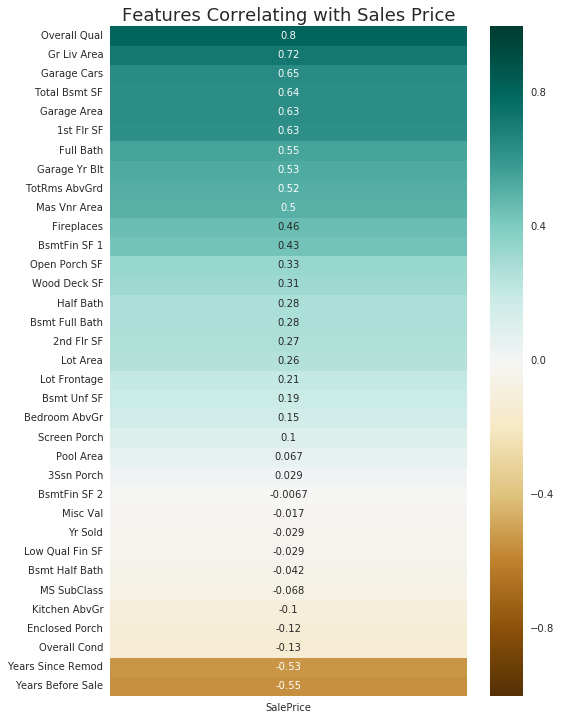

In [18]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(numerical_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)[1:], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18});

In [19]:
# Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

Overall Qual         0.797407
Gr Liv Area          0.723162
Garage Cars          0.648424
Total Bsmt SF        0.640217
Garage Area          0.633979
1st Flr SF           0.631162
Years Before Sale    0.550787
Full Bath            0.549758
Years Since Remod    0.533377
Garage Yr Blt        0.527265
TotRms AbvGrd        0.515490
Mas Vnr Area         0.500521
Fireplaces           0.456960
BsmtFin SF 1         0.430929
Name: SalePrice, dtype: float64

In [20]:
# Drop columns with less than 0.4 correlation with SalePrice
transformed = transformed.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

We generated a correlation heatmap of the numerical features in the training dataset. We found that the top 5 features that correlated the strongest with `SalePrice` are:

- `Overall Qual`
- `Gr Liv Area`
- `Garage Cars`
- `Total Bsmt SF`
- `Garage Area`

We then filtered the correlation coefficients for the columns so that we only kept the coefficients over 0.4, which we considered as the cutoff from moderate to strong correlation. By doing so, we dropped all the coefficients under 0.4 from the the `transformed` dataset.

Let's now take a look at the columns of the `object` type and see which columns in the dataframe should be converted to the `categorical` type. Some other things we should think about:

- If a categorical column has hundreds of unique values (or categories), should we keep it? 
- Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? 

In [21]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 0 to 2929
Data columns (total 51 columns):
MS Zoning            2767 non-null object
Street               2767 non-null object
Lot Shape            2767 non-null object
Land Contour         2767 non-null object
Utilities            2767 non-null object
Lot Config           2767 non-null object
Land Slope           2767 non-null object
Neighborhood         2767 non-null object
Condition 1          2767 non-null object
Condition 2          2767 non-null object
Bldg Type            2767 non-null object
House Style          2767 non-null object
Overall Qual         2767 non-null int64
Roof Style           2767 non-null object
Roof Matl            2767 non-null object
Exterior 1st         2767 non-null object
Exterior 2nd         2767 non-null object
Mas Vnr Type         2767 non-null object
Mas Vnr Area         2767 non-null float64
Exter Qual           2767 non-null object
Exter Cond           2767 non-null object
Foundation 

In [22]:
object_df = transformed.select_dtypes(include=['object'])
print('Number of Object Columns:', object_df.shape[1])

Number of Object Columns: 36


In [23]:
# dropping columns with over 10 categories

for col in object_df.columns:
    if len(object_df[col].unique()) >= 10:
        object_df = object_df.drop(col, axis=1)
    
print('Number of Object Columns left:', object_df.shape[1])

Number of Object Columns left: 33


In [24]:
for col in object_df.columns:
    
    # Convert object columns to categorical type
    object_df[col] = object_df[col].astype('category') 
    
    # dropping columns with over 10 categories
    if len(object_df[col].unique()) > 10:
        object_df = object_df.drop(col, axis=1) 
        
    # dropping columns where 95% or more of the values belong to a specific category
    elif object_df[col].value_counts().max()/len(object_df) > 0.95:
        object_df = object_df.drop(col, axis=1) 
    
print('Number of Object Columns left:', object_df.shape[1])

Number of Object Columns left: 25


In [25]:
# columns we have left

object_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2767 entries, 0 to 2929
Data columns (total 25 columns):
MS Zoning         2767 non-null category
Lot Shape         2767 non-null category
Land Contour      2767 non-null category
Lot Config        2767 non-null category
Condition 1       2767 non-null category
Bldg Type         2767 non-null category
House Style       2767 non-null category
Roof Style        2767 non-null category
Mas Vnr Type      2767 non-null category
Exter Qual        2767 non-null category
Exter Cond        2767 non-null category
Foundation        2767 non-null category
Bsmt Qual         2767 non-null category
Bsmt Cond         2767 non-null category
Bsmt Exposure     2767 non-null category
BsmtFin Type 1    2767 non-null category
BsmtFin Type 2    2767 non-null category
Heating QC        2767 non-null category
Electrical        2767 non-null category
Kitchen Qual      2767 non-null category
Functional        2767 non-null category
Garage Type       2767 non-null 

In [26]:
# creating dummy columns 
for col in object_df.columns:
    dummies = pd.get_dummies(object_df[col])
    object_df = pd.concat([object_df, dummies], axis=1)
    del object_df[col]


Now we can update the logic for the `select_features` function to reflect the steps we just went through.  

In [27]:
# updating logic of select_features
# df = dataframe, coeff_threshold = cutoff for correlation, and cat_threshold = num of categories cutoff
# default set at 0.4 and 10

def select_features(df, coeff_threshold=0.4, cat_threshold=10):
    
    # calc corr coeffs and then dropping those that do not meet threshold
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    numerical_df = numerical_df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    # iso object types, dropping cols over cat_threshold, and cols where 95% or more of values belong
    # in specific category
    object_df = df.select_dtypes(include=['object']).copy()
    for col in object_df.columns:
        object_df[col] = object_df[col].astype('category') 
        if len(object_df[col].unique()) > cat_threshold:
            object_df = object_df.drop(col, axis=1)
        elif object_df[col].value_counts().max()/len(object_df) > 0.95:
            object_df = object_df.drop(col, axis=1)
            
    df = pd.concat([numerical_df, object_df], axis=1)
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(df.select_dtypes(include=['object']), axis=1)
    return df    

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transformed = transform_features(df)
selected = select_features(transformed)
rmse = train_and_test(selected)

rmse

28446.662900141655

We see that updating the log for the `select_features` function has greatly reduced the RMSE as compared to when we updated the logic for just the `transform_features` function. We went from approximately 54350, down to approximately 28447. 

## Train and Test

Now for the final part of the pipeline, training and testing. When iteration on different features, using simple validation is a good idea. Let's add a parameter named `k` that controls the type of cross validation that occurs. 

In [28]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = LinearRegression()
    
    # when k=0, perform holdout validation (already implemented)
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    # when k=1, perform simple cross validation
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    
    # when k > 0, implement k-fold cross validation using k folds
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
    
    
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transformed = transform_features(df)
selected = select_features(transformed)
rmse = train_and_test(selected, k=0)

print('When k=0:', rmse)

When k=0: 28446.662900141655


In [29]:
rmse = train_and_test(selected, k=1)
print('When k=1:', rmse)

28446.662900141655
31040.385768505846
When k=1: 29743.524334323753


In [30]:
rmse = train_and_test(selected, k=3)
print('When k=3:', rmse)

[24165.126697054846, 26616.145975563933, 34713.44720292979]
When k=3: 28498.23995851619


In [31]:
rmse = train_and_test(selected, k=5)
print('When k=5:', rmse)

[22182.619616487755, 27869.957433229356, 40384.035127502175, 27459.89779644334, 24489.56458386524]
When k=5: 28477.214911505573


In [32]:
rmse = train_and_test(selected, k=7)
print('When k=7:', rmse)

[27491.634395275192, 24659.347918080533, 22311.639140791434, 26817.868147678735, 24239.44327316724, 45217.89263558086, 24691.140170869658]
When k=7: 27918.42366877766


In [33]:
rmse = train_and_test(selected, k=10)
print('When k=10:', rmse)

[28787.02786447466, 28514.917782169112, 31197.934045386966, 23484.249548989268, 48091.06382764174, 25035.915618006984, 24690.186407810103, 28365.145455471775, 22424.66638426361, 20489.634496835504]
When k=10: 28108.074143104972


## Conclusion

We have now updated our 3 main functions: `transform_feature`, `select_feature`, and `train_and_test`. We now have a pipeline to input different parameters and play around with the functions. From the tests we ran above, we see that performing k-fold cross validations result in a lower RMSE value than if we were to perform a holdout or simple cross validation.

## Next Steps

Some potential next steps that I can take to further improve on this project:

- Continue iteration on feature engineering:
    - Reserach some other approaches to feature engineering online around housing data
    - Visit the [Kaggle kernels page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) for this dataset to see approaches others took 

- Improve feature selection
    - Research ways of doing feature selection better with categorical columns